# 用Basemap可视化地理数据

地理数据可视化是数据科学中一种十分常见的可视化类型。`Matplotlib` 做此类可视化的主要工具是 `Basemap` 工具箱，它是 `Matplotlib` 的 `mpl_toolkits` 命名空间里的众多工具箱之一。  
坦白说，`Basemap` 用起来有点笨重，就算做点儿简单的可视化图也需要花费比预期更长的时间。在处理比较复杂的地图可视化任务时，更现代的解决方案可能会更适用一些，比如 `leaflet` 开发库或 `Google Maps API`。  
然而，`Basemap` 符合 `Python` 用户的使用习惯。本节将演示一些利用 `Basemap` 工具箱绘制地图的可视化示例。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.basemap import Basemap

# python3.7 basemap包已经被遗弃
# python3 -m pip install basemap
# ERROR: Could not find a version that satisfies the requirement basemap (from versions: none)
# ERROR: No matching distribution found for basemap

# Debian10 + Python3.7 按照下面的方式安装成功
# apt-get install libgeos-dev
# pip install https://github.com/matplotlib/basemap/archive/master.zip

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


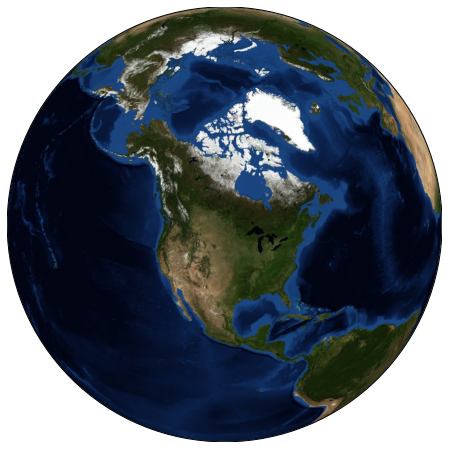

In [2]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5)

这里显示的地球并不是一个静止的图形。它是一个用球面坐标系构建的、功能齐全的 `Matplotlib` 坐标轴，可以很轻易地在地图上增添数据！  
例如，我们可以将地图投影放大到北美洲，然后标出西雅图的位置。用 `ETOPO` 地图（`etopo image`，显示陆地与海底的地形特征）作为背景：

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(2347268.222744085, 4518079.266407731, ' Seattle')

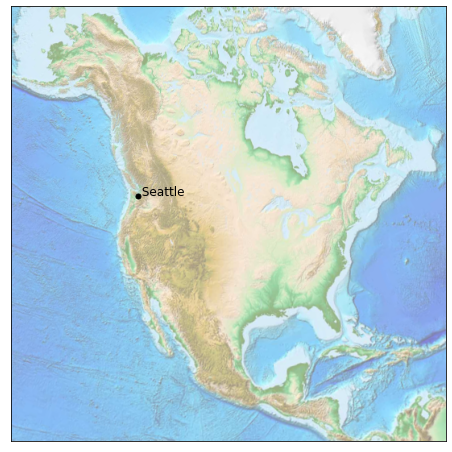

In [3]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None, width=8E6, height=8E6, lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# 地图上的(经度, 纬度)对应图上的(x, y)坐标
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12)

## 1. 地图投影

当你想使用地图时，首先要做的就是确定地图的投影类型。你可能已经知道，像地球这样的球体，可以通过球面透视法将三维球面投影成一个二维平面，不会造成变形，也不会破坏其连续性。  
这些投影类型随着人类历史进程逐渐发展起来，现在已经有许多选择。根据地图投影类型的不同用途，有一些地图特征（例如方向、面积、距离、形状或其他因素）值得关注一下。  
`Basemap` 程序包里面实现了几十种 投影类型，所有投影都有一个简便格式码。  

In [4]:
# 首先定义一个可以画带经纬线地图的简便方法：
from itertools import chain

def draw_map(m, scale=0.2):
    # 画地貌晕渲图
    m.shadedrelief(scale=scale)
    
    # 用字典表示经纬度
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # 字典的键是plt.Line2D示例
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # 用循环将所有线设置成需要的样式
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

### 1.1. 圆柱投影

圆柱投影（`cylindrical projection`）是最简单的地图投影类型，纬度线与经度线分别映射成水平线与竖直线。  
采用这种投影类型的话，赤道区域的显示效果非常好，但是南北极附近的区域就会严重变形。由于纬度线的间距会因圆柱投影的不同而不同，所以就有了不同的投影属性和南北极附近不同的变形程度。  
我们在下图中画了一个**等距圆柱投影**，不同纬度在子午线方向的间距保持不变。另外两种圆柱投影是墨卡托（`Mercator，projection='merc'`）投影和圆柱等积（`cylindrical equal-area，projection='cea'`）投影。

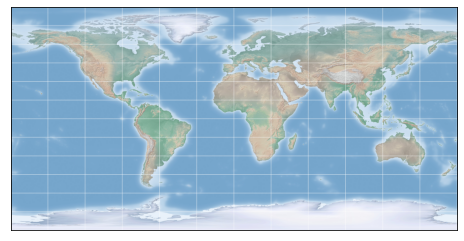

In [5]:
# Basemap 有一些用来设置左下角（llcrnr）和右上角（urcrnr）纬度（lat）和经度（lon）的参数。
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

### 1.2. 伪圆柱投影

伪圆柱投影（`pseudo-cylindrical projection`）的经线不再必须是竖直的，这样可以使南北极附近的区域更加真实。  
摩尔威德（`Mollweide，projection='moll'`）投影就是这类投影的典型代表，它所有的经线都是椭圆弧线，如下图所示。  
这么做是为了保留地图原貌——虽然南北极附近的区域还有一些变形，但是通过一些区域小图可以反映真实情况。  
其他伪圆柱投影类型有正弦（`sinusoidal，projection='sinu'`）投影和罗宾森（`Robinson，projection='robin'`m）投影。

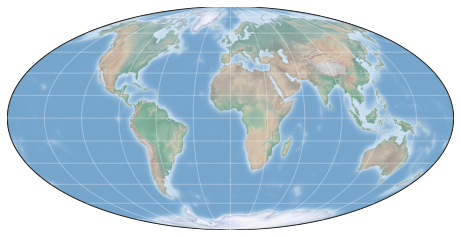

In [6]:
# Basemap 提供了两个额外参数，用来表示地图中心的纬度（lat_0）和经度（lon_0）。
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None, lat_0=0, lon_0=0)
draw_map(m)

### 1.3. 透视投影

透视投影（`perspective projection`）是从某一个透视点对地球进行透视获得的投影，就好像你站在太空中某一点给地球照相一样（通过技术处理，有些投影类型的透视点可以放在地球上）。  
一个典型示例是正射（`orthographic，projection='ortho'`）投影，从无限远处观察地球的一侧。因此，这种投影一次只能显示半个地球。  
其他的透视投影类型还有球心（`gnomonic，projection='gnom'`）投影和球极平面（stereographic，projection='stere'）投影。这些投影经常用于显示地图的较小面积区域。

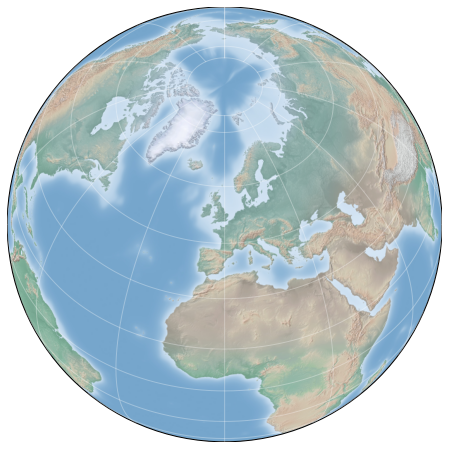

In [7]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=0)
draw_map(m)

### 1.4. 圆锥投影

圆锥投影（`conic projection`）是先将地图投影成一个圆锥体，然后再将其展开。这样做虽然可以获得非常好的局部效果，但是远离圆锥顶点的区域可能会严重变形。  
一个典型示例就是兰勃特等角圆锥投影（`Lambert conformal conic projection，projection='lcc'`），也就是我们之前见到的北美洲地图。  
这种方法将地图投影成一个由两条标准纬线（用 `Basemap` 里的 `lat_1` 与 `lat_2` 参数设置）构成的圆锥，这两条纬线距离是经过精心挑选的，在两条标准纬线之内比例尺逐渐减小，在两线之外的比例尺逐渐增大。  
其他常用的圆锥投影还有等距圆锥（`equidistant conic，projection='eqdc'`）投影和阿尔伯斯等积圆锥（`Albers equal- area，projection='aea'`）投影，如下图所示。圆锥投影和透视投影一样，适合显示较小与中等区域的地图。

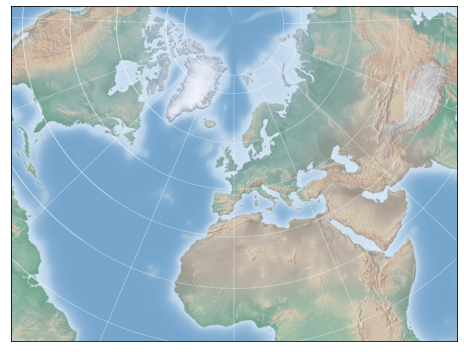

In [8]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            lon_0=0, lat_0=50, lat_1=45, lat_2=55,
            width=1.6E7, height=1.2E7)
draw_map(m)

## 2. 画一个地图背景

前面介绍过，用 `bluemarble()` 和 `shadedrelief()` 方法可以画出地球投影，用 `drawparallels()` 和 `drawmeridians()` 方法可以画出纬线与经线。  
`Basemap` 程序包中有许多实用的函数，可以画出各种地形的轮廓，如陆地、海洋、湖泊、河流、各国的政治分界线，甚至于美国各州县的边界线。  
下面列举了一些画图函数，你可以通过 `IPython` 的帮助功能查看它们的具体用法。
- 物理边界与水体
    - `drawcoastlines()`  绘制大陆海岸线
    - `drawlsmask()`  为陆地与海洋设置填充色，从而可以在陆地或海洋投影其他图像
    - `drawmapboundary()`  绘制地图边界，包括为海洋填充颜色
    - `drawrivers()`  绘制河流
    - `fillcontinents()`  用一种颜色填充大陆，用另一种颜色填充湖泊（可选）
- 政治边界
    - `drawcountries()`  绘制国界线
    - `drawstates()`  绘制美国州界线
    - `drawcounties()`  绘制美国县界线
- 地图功能
    - `drawgreatcircle()`  在两点之间绘制一个大圆
    - `drawparallels()`  绘制纬线
    - `drawmeridians()`  绘制经线
    - `drawmapscale()`  在地图上绘制一个线性比例尺
- 地球影像
    - `bluemarble()`  绘制 NASA 蓝色弹珠地球投影
    - `shadedrelief()`  在地图上绘制地貌晕渲图
    - `etopo()`  在地图上绘制地形晕渲图
    - `warpimage()`  将用户提供的图像投影到地图上

如果要使用边界特征，就必须在创建 `Basemap` 图形时设置分辨率。`Basemap` 类提供了 `resolution` 参数来设置边界的分辨率，可用值分别是 `'c'（原始分辨率）`、`'l'（低分辨率）`、`'i'（中等分辨率）`、`'h'（高分辨率）`、`'f'（全画质分辨率）`，如果不使用边界线则用 `None`。这个参数的设置非常重要：如果为世界地图的边界线设置了高分辨率，那么图形渲染会很慢。

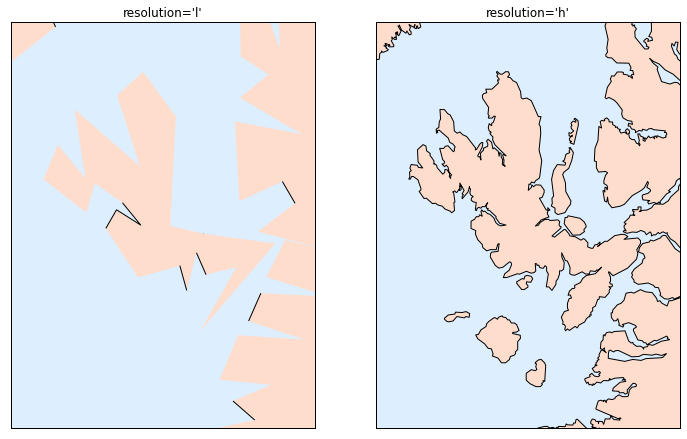

In [9]:
# 下面是一个绘制海岸线的示例，来看看两种不同分辨率的绘制效果。
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

for i, res in enumerate(['l', 'h']):
    m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2,
                width=90000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
    m.drawmapboundary(fill_color="#DDEEFF")
    m.drawcoastlines()
    ax[i].set_title("resolution='{0}'".format(res))

## 3. 在地图上画数据

`Basemap` 工具箱最实用的功能可能就是以地图为背景画上各种数据。使用任意 `plt` 函数就可以在地图上画出简单的图形与文字；  
你可以用 `Basemap` 实例将纬度与经度坐标投影为直角坐标系 `(x, y)`，就像前面在西雅图地图示例中介绍的那样。  
除此之外，`Basemap` 实例中的许多方法都是与地图有关的函数。这些函数与标准 `Matplotlib` 函数的用法类似，只是都多了一个布尔参数 `latlon`。  
如果将它设置为 `True`，就表示使用原来的经度纬度坐标，而不是投影为 `(x, y)` 坐标。
部分与地图有关的方法如下所示。
- `contour()` / `contourf()`  绘制等高线 / 填充等高线
- `imshow()`  绘制一个图像
- `pcolor()` / `pcolormesh()`  绘制带规则 / 不规则网格的伪彩图（`pseudocolor plot`）
- `plot()`  绘制线条和 / 或标签
- `scatter()`  绘制带标签的点
- `quiver()`  绘制箭头
- `barbs()`  绘制风羽（`wind barb`）
- `drawgreatcircle()`  绘制大圆圈

## 4. 案例：美国加州城市数据

In [10]:
import pandas as pd

cities = pd.read_csv('../data/california_cities.csv')

# 提取需要的数据
lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values

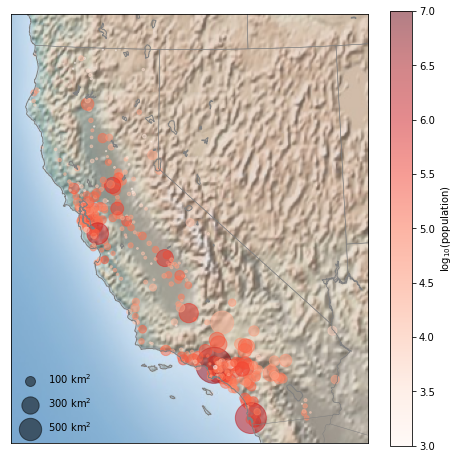

In [11]:
# 建立地图投影，绘制数据散点，并创建颜色条与图例
# 1. 绘制地图背景
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', lat_0=37.5, lon_0=-119, width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. 绘制城市数据散点，用颜色表示人口数据
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. 创建颜色条与图例
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# 用虚拟点绘制图例
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a, label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='lower left')

## 5. 案例：地表温度数据

下面再来演示一个数据更具有连续性的地理数据可视化——2014 年 1月“极地涡旋”（`polar vortex`）袭击美国东部的案例。  
完整的历史气候数据可以在美国宇航局戈达德太空研究所（<http://data.giss.nasa.gov/>，`NASA's Goddard Institute for Space Studies`）的网站找到。

In [12]:
!cp ../data/gistemp250.nc.gz /tmp
!gunzip /tmp/gistemp250.nc.gz

In [13]:
# pip3 install netcdf4  # 数据是 NetCDF 格式，可以用 Python 的 netCDF4 程序库读取。
from netCDF4 import Dataset
data = Dataset('/tmp/gistemp250.nc')

In [14]:
# 文件里包含了大量全球气温数据，我们只需要选择 2014 年 1 月 15 日的数据：
from netCDF4 import date2index
from datetime import datetime
timeindex = date2index(datetime(2014, 1, 15), data.variables['time'])

In [15]:
# 然后，加载经度与纬度数据，并将气温也提取出来：
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
lon, lat = np.meshgrid(lon, lat)
temp_anomaly = data.variables['tempanomaly'][timeindex]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys


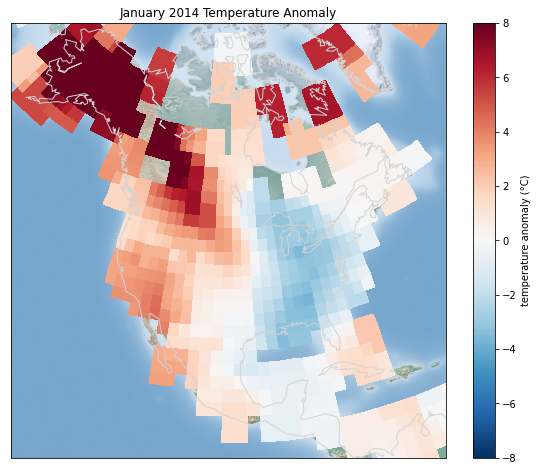

In [16]:
# 最后，用 pcolormesh() 方法绘制数据的彩色网格。我们主要关注北美地区，用地貌晕渲图作为背景。
# 请注意，这里特地选用了发散（divergent）颜色条，有一个中间颜色表示 0，两边的颜色分别表示负数值与正数值（如图 4-110 所示）。
# 我们还在图中浅浅地绘制了海岸线作为参照：
fig = plt.figure(figsize=(10, 8))
m = Basemap(projection='lcc', resolution='c', width=8E6, height=8E6, lat_0=45, lon_0=-100,)
m.shadedrelief(scale=0.5)
m.pcolormesh(lon, lat, temp_anomaly, latlon=True, cmap='RdBu_r')
plt.clim(-8, 8)
m.drawcoastlines(color='lightgray')

plt.title('January 2014 Temperature Anomaly')
plt.colorbar(label='temperature anomaly (°C)')

In [17]:
!rm -f /tmp/gistemp250.nc